In [84]:
import pandas as pd

In [85]:
data=pd.read_json("Cell_Phones_and_Accessories.json")

In [86]:
data.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [87]:
p=data['IC'].unique()
p.shape

(48134,)

In [88]:
data.drop(columns=['Rev_verify','Review_Date','Prod_meta','Reviewer_Name','Review_timestamp','Useful','Prod_img'],inplace=True)
data.head()

,Rating,IC,Review,Rev_summ
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery


In [89]:
data.shape

(760450, 4)

In [90]:
data.isnull().sum()

Rating        0
IC            0
Review      530
Rev_summ    355
dtype: int64

In [91]:
data.dropna(inplace=True,axis=0)

In [92]:
print(data['Review'][760446])
print(data['Rev_summ'][760446])

My name is Cynthia Beard and I believe that the Samsung Galaxy car mount is a great thing to have, it helps you are driving and someone is calling you and all you have to do is look to see if you want to talk to that person or not it is a wonderful product to have and fairley easy to put on I thank you for letting me review and buy your product at a big discount.
... believe that the Samsung Galaxy car mount is a great thing to have


In [93]:
data.isnull().sum()

Rating      0
IC          0
Review      0
Rev_summ    0
dtype: int64

In [94]:
data.shape

(759602, 4)

In [95]:
import re
import nltk


In [96]:
alternates = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [97]:
def clean_text(text):
    text=text.lower() 
    text=text.split()
    new_text=[]
    for word in text:
        if word not in alternates:
            new_text.append(word)
        else:
            new_text.append(alternates[word])
    text=' '.join(new_text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    
    text=text.split()
    stop_words=nltk.corpus.stopwords.words('english')
    text=[word for word in text if word not in stop_words]
    text=" ".join(text)
    return text

In [98]:
summary=[]

for sumary in data.Rev_summ:
    summary.append(clean_text(sumary))

data['clean_rev_summary']=summary
data.head()

,Rating,IC,Review,Rev_summ,clean_rev_summary
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,happy
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,five stars
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,long know put
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,good case overall
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,awesome battery


In [99]:
review_sum=[]
for review in data.Review:
    review_sum.append(clean_text(review))

data['clean_review']=review_sum
data.head()    

,Rating,IC,Review,Rev_summ,clean_rev_summary,clean_review
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,happy,bought husband happy
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,five stars,great screen protector even seem though
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,long know put,saved lots money gorilla glass careful subject...
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,good case overall,material fit nice color neon green expected wo...
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,awesome battery,last 3 days till charge take forever charge ma...


In [100]:
data.shape

(759602, 6)

In [101]:
data['Review'][2]

"Saved me lots of money! it's not gorilla glass, so be careful as it will be subject to easier scratching. it also doesn't have sticky stuff on the glass like the original. If you press hard on the glass, the digitizer will go crazy. Just shut the screen on and off, and you'll be fine."

In [102]:
data['clean_review'][2]

'saved lots money gorilla glass careful subject easier scratching also sticky stuff glass like original press hard glass digitizer go crazy shut screen shall fine'

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec=TfidfVectorizer()
fearures=tfidf_vec.fit_transform(data['clean_review'])
print(fearures.shape)


(759602, 100555)


In [104]:
def word_count(wordcount,text):
    for sentence in text:
        for word in sentence.split():
            if word not in wordcount:
                wordcount[word]=1
            else:
                wordcount[word]+=1
                

In [105]:
count_of_words={}

word_count(count_of_words,data['clean_review'])
print(len(count_of_words))


111177


In [106]:
data['len_clean_review']=data['clean_review'].apply(lambda x:len(x.split()))
data.head()

,Rating,IC,Review,Rev_summ,clean_rev_summary,clean_review,len_clean_review
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,happy,bought husband happy,3
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,five stars,great screen protector even seem though,6
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,long know put,saved lots money gorilla glass careful subject...,25
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,good case overall,material fit nice color neon green expected wo...,9
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,awesome battery,last 3 days till charge take forever charge ma...,45


In [107]:
import matplotlib.pyplot as plt
import numpy as np

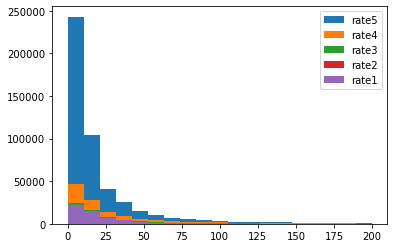

In [108]:
bins=np.linspace(0,200,20)
plt.hist(data[data['Rating']==5]['len_clean_review'],bins,label='rate5')
plt.hist(data[data['Rating']==4]['len_clean_review'],bins,label='rate4')
plt.hist(data[data['Rating']==3]['len_clean_review'],bins,label='rate3')
plt.hist(data[data['Rating']==2]['len_clean_review'],bins,label='rate2')
plt.hist(data[data['Rating']==1]['len_clean_review'],bins,label='rate1')
plt.legend()
plt.show()

In [109]:
count_of_words

{'bought': 53801,
 'husband': 6800,
 'happy': 26560,
 'great': 220820,
 'screen': 180524,
 'protector': 84321,
 'even': 55399,
 'seem': 10912,
 'though': 26933,
 'saved': 4843,
 'lots': 3837,
 'money': 19901,
 'gorilla': 1157,
 'glass': 38330,
 'careful': 5412,
 'subject': 342,
 'easier': 10187,
 'scratching': 1752,
 'also': 73575,
 'sticky': 4869,
 'stuff': 5424,
 'like': 162136,
 'original': 14086,
 'press': 8867,
 'hard': 39916,
 'digitizer': 857,
 'go': 32941,
 'crazy': 2112,
 'shut': 2018,
 'shall': 8442,
 'fine': 26149,
 'material': 13621,
 'fit': 75517,
 'nice': 89368,
 'color': 34868,
 'neon': 379,
 'green': 4263,
 'expected': 17881,
 'would': 129000,
 'liked': 8824,
 'last': 22517,
 '3': 48513,
 'days': 19152,
 'till': 1158,
 'charge': 76891,
 'take': 33467,
 'forever': 2141,
 'make': 35257,
 'sure': 27408,
 'plug': 18357,
 'early': 1777,
 'night': 6625,
 'fully': 10091,
 'charged': 16227,
 'morning': 1755,
 'sometimes': 8484,
 'get': 94083,
 'home': 12470,
 'late': 1122,
 '1a

In [110]:
test=data[['IC','clean_rev_summary','clean_review','Rating']]
test.head()

,IC,clean_rev_summary,clean_review,Rating
0,B009XD5TPQ,happy,bought husband happy,5
1,B016MF3P3K,five stars,great screen protector even seem though,5
2,B008DC8N5G,long know put,saved lots money gorilla glass careful subject...,5
3,B0089CH3TM,good case overall,material fit nice color neon green expected wo...,3
4,B00AKZWGAC,awesome battery,last 3 days till charge take forever charge ma...,4


In [111]:
aggregations=test.groupby('IC').agg({'Rating': ['mean', 'min', 'max']})
aggregations.columns=['Mean_rating','Min_rating','Max_rating']
aggregations

,Mean_rating,Min_rating,Max_rating
IC,,,
7508492919,4.300000,1,5
7532385086,3.285714,1,5
7887421268,3.538462,1,5
8199900164,3.750000,2,5
8288853439,3.818182,1,5
...,...,...,...
B01HJBS5C2,3.250000,1,5
B01HJC7N4C,4.600000,3,5
B01HJCN1UC,4.727273,4,5


In [112]:
result=test.groupby(['IC'])['clean_review'].apply(lambda x: ' '.join(x)).reset_index()
result.head()

,IC,clean_review
0,7508492919,good case low price right never problems besid...
1,7532385086,excited first got case loved color feel starte...
2,7887421268,good item received weeks time nice actually co...
3,8199900164,thank works time charger stopped working days ...
4,8288853439,great far charger seem last pretty good 3 year...


In [113]:
df = pd.merge(result,aggregations[['Mean_rating','Min_rating','Max_rating']],on='IC')
df.head()

,IC,clean_review,Mean_rating,Min_rating,Max_rating
0,7508492919,good case low price right never problems besid...,4.300000,1,5
1,7532385086,excited first got case loved color feel starte...,3.285714,1,5
2,7887421268,good item received weeks time nice actually co...,3.538462,1,5
3,8199900164,thank works time charger stopped working days ...,3.750000,2,5
4,8288853439,great far charger seem last pretty good 3 year...,3.818182,1,5


In [122]:
df['Keywords2']=df['clean_review'].apply(lambda x: ' '.join(word for word in keywords(x).split('\n')))

In [123]:
df['Keywords2_len']=df['Keywords2'].apply(lambda x: len(x.split()))

In [124]:
df

,IC,clean_review,Mean_rating,Min_rating,Max_rating,Keywords2,Keywords2_len
0,7508492919,good case low price right never problems besid...,4.300000,1,5,good case cases thanks phone look looked prett...,72
1,7532385086,excited first got case loved color feel starte...,3.285714,1,5,phone case cover covers rubber rubberized like...,15
2,7887421268,good item received weeks time nice actually co...,3.538462,1,5,case phone product great looked looks look nic...,24
3,8199900164,thank works time charger stopped working days ...,3.750000,2,5,works working phone work lol,5
4,8288853439,great far charger seem last pretty good 3 year...,3.818182,1,5,chargers great far charger charge charged char...,30
...,...,...,...,...,...,...,...
48128,B01HJBS5C2,strong protective slim light already ordering ...,3.250000,1,5,casing phone protect protected protects case p...,38
48129,B01HJC7N4C,sons likes price bad recently received free sa...,4.600000,3,5,phone headset apps app device phones adjust ad...,68
48130,B01HJCN1UC,great thanks good cable sure know length longe...,4.727273,4,5,cords kindle kindles charge charges need long ...,49
48131,B01HJCN55I,received cable two days best 10ft cable rechar...,4.454545,2,5,great charging charged charges cable length ti...,16


In [142]:
from nltk.stem import SnowballStemmer,WordNetLemmatizer

stemmer=SnowballStemmer('english')
def lematize(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [172]:
df['stemmed_keywords']=df['Keywords2'].apply(lambda x: ' '.join(lematize(word) for word in x.split() if len(lematize(word))>3))

In [173]:
print('Key words of the text:\n',df['Keywords2'][0])
print('Key words after stemming:\n',df['stemmed_keywords'][0])

Key words of the text:
 good case cases thanks phone look looked pretty cute wanted like looks phones pockets love loves looking expect want wants daughter loved stones picture great buy liked got iphone come comes daughters pocket came price bow buying products happy fall easily long time product recommend recommended expected nicely nice drop dropped dropping quality hard compliments extra extras gems thank started use cover girly beautiful fits fitting day days noticeable notice attached took
Key words after stemming:
 good case case thank phone look look pretti cute want like look phone pocket love love look expect want want daughter love stone pictur great like iphon come come daughter pocket come price product happi fall easili long time product recommend recommend expect nice nice drop drop drop qualiti hard compliment extra extra thank start cover beauti notic notic attach take


In [174]:
from collections import OrderedDict

df['cleaned_keywords']=df['stemmed_keywords'].str.split().apply(lambda x: ' '.join(OrderedDict.fromkeys(x).keys()))

In [175]:
print('Key words of the text:\n',df['Keywords2'][0])
print('Key words after stemming:\n',df['stemmed_keywords'][0])
print('Cleaned Key words:\n',df['cleaned_keywords'][0])

Key words of the text:
 good case cases thanks phone look looked pretty cute wanted like looks phones pockets love loves looking expect want wants daughter loved stones picture great buy liked got iphone come comes daughters pocket came price bow buying products happy fall easily long time product recommend recommended expected nicely nice drop dropped dropping quality hard compliments extra extras gems thank started use cover girly beautiful fits fitting day days noticeable notice attached took
Key words after stemming:
 good case case thank phone look look pretti cute want like look phone pocket love love look expect want want daughter love stone pictur great like iphon come come daughter pocket come price product happi fall easili long time product recommend recommend expect nice nice drop drop drop qualiti hard compliment extra extra thank start cover beauti notic notic attach take
Cleaned Key words:
 good case thank phone look pretti cute want like pocket love expect daughter ston

In [181]:
df['Len_cleaned_keywords']=df['cleaned_keywords'].apply(lambda x: len(x.split()))

In [183]:

df['final_keywords']=df['cleaned_keywords'].apply(lambda x: ' '.join(x.split()[:30]))

In [184]:
df['Len_final_words']=df['final_keywords'].apply(lambda x: len(x.split()))

In [186]:
df.tail(10)

,IC,clean_review,Mean_rating,Min_rating,Max_rating,Keywords2,Keywords2_len,cleaned_keywords,cleaned_keywords_len,stemmed_keywords,final_keywords,Len_final_words,Len_cleaned_keywords
48123,B01HIDXY2C,best screen protector found phone especially m...,4.000000,2,5,glass phone screen protector problem money maybe,7,glass phone screen protector problem money mayb,7,glass phone screen protector problem money mayb,glass phone screen protector problem money mayb,7,7
48124,B01HIJESIK,charge fast original charge quicker every devi...,3.857143,1,5,charger chargers charging charges charge fast ...,12,charger charg fast work samsung product,12,charger charger charg charg charg fast work wo...,charger charg fast work samsung product,6,6
48125,B01HIRQLNW,i've tried several different styles magnetic t...,4.750000,3,5,mounts mounted vent vents magnetic phone case ...,81,mount vent magnet phone case strong clip aweso...,81,mount mount vent vent magnet phone case magnet...,mount vent magnet phone case strong clip aweso...,30,46
48126,B01HISNNXC,firstly packaging product unique generic chine...,3.500000,1,5,screen protectors protector companies company ...,39,screen protector compani note phone premium ef...,39,screen protector protector compani compani not...,screen protector compani note phone premium ef...,26,26
48127,B01HITC2O2,best case oneplus 3 well made case gives one p...,4.600000,3,5,case oneplus protection protects hole headphon...,19,case oneplus protect hole headphon screen bran...,19,case oneplus protect protect hole headphon hea...,case oneplus protect hole headphon screen bran...,14,14
48128,B01HJBS5C2,strong protective slim light already ordering ...,3.250000,1,5,casing phone protect protected protects case p...,38,case phone protect clip great slim cutout hols...,38,case phone protect protect protect case protec...,case phone protect clip great slim cutout hols...,25,25
48129,B01HJC7N4C,sons likes price bad recently received free sa...,4.600000,3,5,phone headset apps app device phones adjust ad...,68,phone headset devic adjust glass search receiv...,68,phone headset devic phone adjust adjust adjust...,phone headset devic adjust glass search receiv...,30,39
48130,B01HJCN1UC,great thanks good cable sure know length longe...,4.727273,4,5,cords kindle kindles charge charges need long ...,49,cord kindl charg need long excel great thank g...,49,cord kindl kindl charg charg need long cord ex...,cord kindl charg need long excel great thank g...,30,30
48131,B01HJCN55I,received cable two days best 10ft cable rechar...,4.454545,2,5,great charging charged charges cable length ti...,16,great charg cabl length time work color galaxi...,16,great charg charg charg cabl length time work ...,great charg cabl length time work color galaxi...,12,12
48132,B01HJH9IN6,received thin need put max protection package ...,2.833333,1,5,cases cool case phone nice cracked drop kind l...,11,case cool phone nice crack drop kind like prot...,11,case cool case phone nice crack drop kind like...,case cool phone nice crack drop kind like prot...,10,10


In [187]:
df.to_csv('Product_Review_summ_solution.csv')